# 1.0 EDA(Stack Overflow Annual Developer Survey 2023)

Analyzing responses from the Stack Overflow Annual Developer Survey 2023

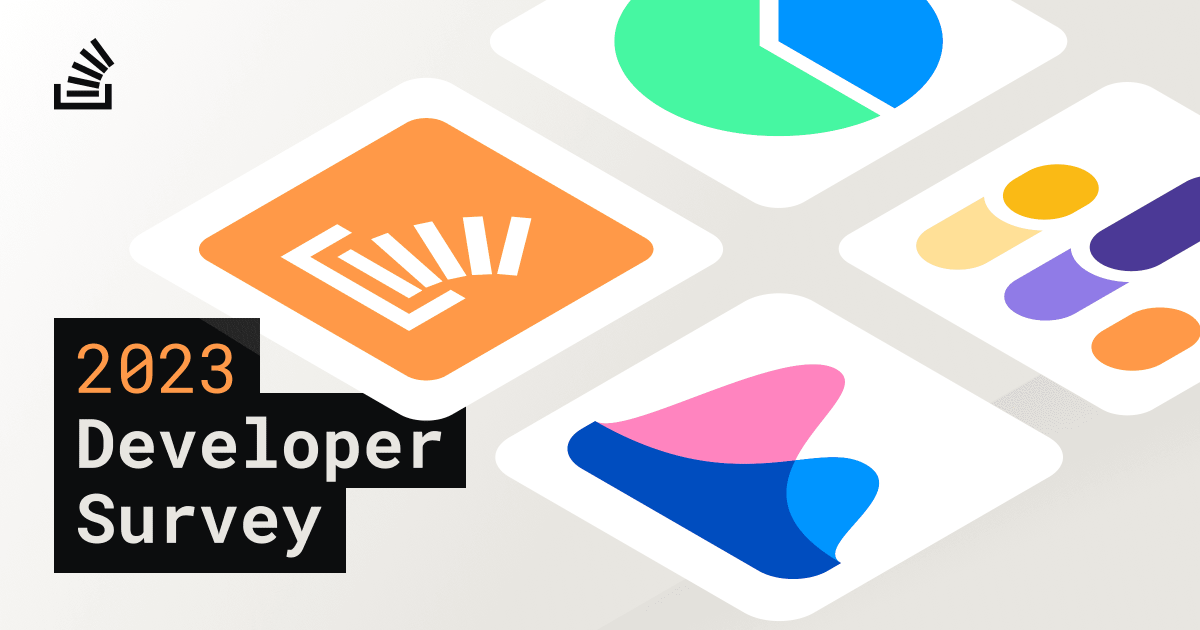

In [ ]:
from PIL import Image
Image.open('/content/drive/MyDrive/2023.png')

# Intoduction

In the rapidly evolving landscape of technology and software development, understanding the perspectives, preferences, and challenges faced by developers is crucial for guiding industry trends, educational initiatives, and product development. A comprehensive survey was conducted by stackoverflow to gather data from developers worldwide and capture insights about their work environments, programming languages, tools, methodologies, and career aspirations.

OBJECTIVE

The task at hand is to perform a detailed analysis of the collected survey data to extract meaningful and actionable insights and  to practice my python skills learned on a structured data set including loading, inspecting, wrangling, exploring and drawing conclusion from data and have a deep understanding of the stackoverflow developer community .The notebook have the observation with each steps in order to explain throrougly how i approach the data set and based on observation some question are also answered.

Data source & dataset

 Name: "StackOverflow developer survey dataset"

* year: 2023

* description: The dataset contains responses to an annual survey conducted by StackOverflow on how developer learn and level up, which tools they're using, and which ones they want.. The dataset contains over 64,000 responses to 83 questions, from different countries around the world(although many questions are optional).

check more about Stack Overflow Annual Developer Survey:https://insights.stackoverflow.com/survey


The data set contains four files:

README_2023.txt - Information about the dataset

survey_results_schema.csv - The list of questions, and shortcodes for each question

survey_results_public.csv - The full list of responses to the questions

so_survey_2023.pdf - The summary/methodologies of how the survey was conducted.


I use survey_raw to name the data frame to indicate that its unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
survey_raw = pd.read_csv('/content/drive/MyDrive/survey_results_public.csv')
survey_raw

ResponseId     Q120                      MainBranch  \
0               1  I agree                   None of these   
1               2  I agree  I am a developer by profession   
2               3  I agree  I am a developer by profession   
3               4  I agree  I am a developer by profession   
4               5  I agree  I am a developer by profession   
...           ...      ...                             ...   
89179       89180  I agree  I am a developer by profession   
89180       89181  I agree  I am a developer by profession   
89181       89182  I agree     I code primarily as a hobby   
89182       89183  I agree  I am a developer by profession   
89183       89184  I agree  I am a developer by profession   

                      Age                                         Employment  \
0         18-24 years old                                                NaN   
1         25-34 years old                                Employed, full-time   
2         45-54 years old                                Employed, full-time   
3         25-34 years old                                Employed, full-time   
4         25-34 years old  Employed, full-time;Independent contractor, fr...   
...                   ...                                                ...   
89179     25-34 years old  Employed, full-time;Independent contractor, fr...   
89180     18-24 years old             Student, full-time;Employed, part-time   
89181   Prefer not to say                                I prefer not to say   
89182  Under 18 years old             Employed, part-time;Student, part-time   
89183     35-44 years old                                Employed, full-time   

                                 RemoteWork  \
0                                       NaN   
1                                    Remote   
2      Hybrid (some remote, some in-person)   
3      Hybrid (some remote, some in-person)   
4                                    Remote   
...                                     ...   
89179                                Remote   
89180  Hybrid (some remote, some in-person)   
89181                                   NaN   
89182  Hybrid (some remote, some in-person)   
89183  Hybrid (some remote, some in-person)   

                                        CodingActivities  \
0                                                    NaN   
1      Hobby;Contribute to open-source projects;Boots...   
2      Hobby;Professional development or self-paced l...   
3                                                  Hobby   
4      Hobby;Contribute to open-source projects;Profe...   
...                                                  ...   
89179  Hobby;Bootstrapping a business;Freelance/contr...   
89180                            School or academic work   
89181                                                NaN   
89182                      Hobby;School or academic work   
89183  Hobby;Professional development or self-paced l...   

                                                 EdLevel  \
0                                                    NaN   
1           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
...                                                  ...   
89179                Associate degree (A.A., A.S., etc.)   
89180       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
89181                                     Something else   
89182  Secondary school (e.g. American high school, G...   
89183       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                               LearnCode  \
0                                                    NaN   
1      Books / Physical media;Colleague;Friend or fam...   
2      Books / Physical media;Colleague;On the job tr...   
3      Colleague;Friend or family member;Other online.

The dataset contains over 64,000 responses to 83 questions (although many questions are optional). The responses have been anonymized to remove personally identifiable information, and each respondent has been assigned a randomized respondent ID.

To view the list of columns in the data frame.

In [ ]:
survey_raw.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

It appears that shortcodes for questions have been used as column names.

I can refer to the schema file to see the full text of each question. The schema file contains  six columns:


In [ ]:
schema_name = pd.read_csv('/content/drive/MyDrive/survey_results_schema.csv')
schema_name

qid        qname                                           question  \
0    QID16           S0  <div><span style="font-size:19px;"><strong>Hel...   
1    QID12     MetaInfo                                  Browser Meta Info   
2   QID310         Q310  <div><span style="font-size:19px;"><strong>You...   
3   QID312         Q120                                                      
4     QID1           S1  <span style="font-size:22px; font-family: aria...   
..     ...          ...                                                ...   
73  QID289  Knowledge_7  Waiting on answers to questions often causes i...   
74  QID289  Knowledge_8  I feel like I have the tools and/or resources ...   
75  QID290  Frequency_1  Needing help from people outside of your immed...   
76  QID290  Frequency_2  Interacting with people outside of your immedi...   
77  QID290  Frequency_3  Encountering knowledge silos (where one indivi...   

   force_resp  type selector  
0       False    DB       TB  
1       False  Meta  Browser  
2       False    DB       TB  
3        True    MC     SAVR  
4       False    DB       TB  
..        ...   ...      ...  
73        NaN    MC     MAVR  
74        NaN    MC     MAVR  
75        NaN    MC     MAVR  
76        NaN    MC     MAVR  
77        NaN    MC     MAVR  

[78 rows x 6 columns]

We can now use schema_name to retrieve the full question text for any column in survey_results_schema dataframe.



In [ ]:
schema_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   qid         78 non-null     object
 1   qname       78 non-null     object
 2   question    78 non-null     object
 3   force_resp  67 non-null     object
 4   type        78 non-null     object
 5   selector    78 non-null     object
dtypes: object(6)
memory usage: 3.8+ KB


In [ ]:
schema_name.describe()

qid qname                                           question  \
count       78    78                                                 78   
unique      67    78                                                 78   
top     QID289    S0  <div><span style="font-size:19px;"><strong>Hel...   
freq         9     1                                                  1   

       force_resp type selector  
count          67   78       78  
unique          2    6        8  
top         False   MC     MAVR  
freq           58   48       23

The dataset contains over 64,000 responses to 83 questions (although many questions are optional). The responses have been anonymized to remove personally identifiable information, and each respondent has been assigned a randomized respondent ID.


To view the list of columns in the data frame.


In [ ]:
schema_name['question'][17]

'Which of the following describes your current job, the one you do most of the time? Please select only one.'

The data frame contains 78 rows, but only the first & last five rows are displayed by default with Jupyter for brevity. so to view all i use Ipyton.display finction.

In [ ]:
from IPython.display import display
with pd.option_context('display.max_rows', 64000):
    display(schema_name)

qid                 qname  \
0    QID16                    S0   
1    QID12              MetaInfo   
2   QID310                  Q310   
3   QID312                  Q120   
4     QID1                    S1   
5     QID2            MainBranch   
6   QID127                   Age   
7   QID296            Employment   
8   QID308            RemoteWork   
9   QID297      CodingActivities   
10  QID190                    S2   
11   QID25               EdLevel   
12  QID276             LearnCode   
13  QID281       LearnCodeOnline   
14  QID306  LearnCodeCoursesCert   
15   QID32             YearsCode   
16   QID34          YearsCodePro   
17   QID31               DevType   
18   QID29               OrgSize   
19  QID278     PurchaseInfluence   
20  QID322              TechList   
21  QID279            BuyNewTool   
22    QID6               Country   
23   QID50              Currency   
24   QID51             CompTotal   
25   QID61                    S3   
26  QID233              Language   
27  QID262              Database   
28  QID263              Platform   
29  QID264              Webframe   
30  QID265              MiscTech   
31  QID275             ToolsTech   
32  QID274        NEWCollabTools   
33   QID71                 OpSys   
34  QID282      OfficeStackAsync   
35  QID307       OfficeStackSync   
36  QID327              AISearch   
37  QID328                 AIDev   
38   QID91                    S4   
39  QID266            NEWSOSites   
40  QID100           SOVisitFreq   
41  QID101             SOAccount   
42  QID102            SOPartFreq   
43  QID106                SOComm   
44  QID313                    S5   
45  QID325                  SOAI   
46  QID314              AISelect   
47  QID315                AISent   
48  QID324                 AIAcc   
49  QID316                 AIBen   
50  QID319                AITool   
51  QID320                AINext   
52  QID321                AIOpen   
53  QID295                    S6   
54  QID299               TBranch   
55  QID287                ICorPM   
56  QID288               WorkExp   
57  QID289             Knowledge   
58  QID290             Frequency   
59  QID291         TimeSearching   
60  QID292         TimeAnswering   
61  QID304      ProfessionalTech   
62  QID326              Industry   
63  QID286          SOTeamsUsage   
64  QID131                    S7   
65  QID132          SurveyLength   
66  QID133            SurveyEase   
67  QID289           Knowledge_1   
68  QID289           Knowledge_2   
69  QID289           Knowledge_3   
70  QID289           Knowledge_4   
71  QID289           Knowledge_5   
72  QID289           Knowledge_6   
73  QID289           Knowledge_7   
74  QID289           Knowledge_8   
75  QID290           Frequency_1   
76  QID290           Frequency_2   
77  QID290           Frequency_3   

                                             question force_resp    type  \
0   <div><span style="font-size:19px;"><strong>Hel...      False      DB   
1                                   Browser Meta Info      False    Meta   
2   <div><span style="font-size:19px;"><strong>You...      False      DB   
3                                                           True      MC   
4   <span style="font-size:22px; font-family: aria...      False      DB   
5   Which of the following options best describes ...       True      MC   
6                                 What is your age? *       True      MC   
7   Which of the following best describes your cur...      False      MC   
8   Which best describes your current work situation?      False      MC   
9   Which of the following best describes the code...      False      MC   
10  <span style="font-size:22px; font-family: aria...      False      DB   
11  Which of the following best describes the high...       True      MC   
12   How do you learn to code? Select all that apply.      False      MC   
13  What online resources do you use to learn to c...      False      MC   
14  What online course

The data is now loaded. We're ready to move on to the next step of preprocessing & cleaning the data for our analysis.

There are seven sections in this suvery data_set S1 - S7.

1. Basic information

2. Education,work & career

3.  Technology & work culture

4. Stackoverflow usage + community

5. Artificial Inteligence

6. Pofessional developer series (optional)

7. Final Questions

# Data Preparation & Cleaning

While the survey responses contain a wealth of information, so i limit my analysis to the following areas:

1. Demographics of the survey respondents and the global programming community

2. Distribution of programming skills, experience, and preferences

3. Employment-related information, preferences, Industry and opinions

i selected a subset of columns with the relevant data for the analysis.

In [ ]:
selected_columns = [
     'MainBranch',
     'Age',
     'Employment',
     'EdLevel',
     'YearsCode',
     'LearnCode',
     'YearsCodePro',
     'DevType',
     'LanguageHaveWorkedWith',
     'DatabaseHaveWorkedWith',
     'WebframeHaveWorkedWith',
     'Country',
     'Industry',
     'SOAccount',
  ]

To checck the total number of the new subset columns i created using the len function

In [ ]:
len(selected_columns)

14

I extracted a copy of the data from these column into a new data frame survey_df. so that we can continue to modify without affecting the original datasets.

In [ ]:
survey_df = survey_raw[selected_columns].copy()

In [ ]:
survey_df

MainBranch                 Age  \
0                       None of these     18-24 years old   
1      I am a developer by profession     25-34 years old   
2      I am a developer by profession     45-54 years old   
3      I am a developer by profession     25-34 years old   
4      I am a developer by profession     25-34 years old   
...                               ...                 ...   
89179  I am a developer by profession     25-34 years old   
89180  I am a developer by profession     18-24 years old   
89181     I code primarily as a hobby   Prefer not to say   
89182  I am a developer by profession  Under 18 years old   
89183  I am a developer by profession     35-44 years old   

                                              Employment  \
0                                                    NaN   
1                                    Employed, full-time   
2                                    Employed, full-time   
3                                    Employed, full-time   
4      Employed, full-time;Independent contractor, fr...   
...                                                  ...   
89179  Employed, full-time;Independent contractor, fr...   
89180             Student, full-time;Employed, part-time   
89181                                I prefer not to say   
89182             Employed, part-time;Student, part-time   
89183                                Employed, full-time   

                                                 EdLevel YearsCode  \
0                                                    NaN       NaN   
1           Bachelor’s degree (B.A., B.S., B.Eng., etc.)        18   
2           Bachelor’s degree (B.A., B.S., B.Eng., etc.)        27   
3           Bachelor’s degree (B.A., B.S., B.Eng., etc.)        12   
4           Bachelor’s degree (B.A., B.S., B.Eng., etc.)         6   
...                                                  ...       ...   
89179                Associate degree (A.A., A.S., etc.)        20   
89180       Bachelor’s degree (B.A., B.S., B.Eng., etc.)         5   
89181                                     Something else        10   
89182  Secondary school (e.g. American high school, G...         3   
89183       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        17   

                                               LearnCode YearsCodePro  \
0                                                    NaN          NaN   
1      Books / Physical media;Colleague;Friend or fam...            9   
2      Books / Physical media;Colleague;On the job tr...           23   
3      Colleague;Friend or family member;Other online...            7   
4      Books / Physical media;Online Courses or Certi...            4   
...                                                  ...          ...   
89179  Online Courses or Certification;Other online r...            5   
89180  Colleague;Online Courses or Certification;Othe...          NaN   
89181  Books / Physical media;Hackathons (virtual or ...          NaN   
89182  Online Courses or Certification;Other online r...          NaN   
89183  Colleague;Online Courses or Certification;Othe...           12   

                                    DevType  \
0                                       NaN   
1      Senior Executive (C-Suite, VP, etc.)   
2                       Developer, back-end   
3                      Developer, front-end   
4                     Developer, full-stack   
...                                     ...   
89179                  Developer, front-end   
89180                   Developer, back-end   
89181                                   NaN   
89182                  System administrator   
89183                 Developer, full-stack   

                                  LanguageHaveWorkedWith  \
0                                                    NaN   
1                             HTML/CSS;JavaScript;Python   
2                             Bash/Shell (all shells);Go   
3      Bash/Shell (all shells);HTML/CSS;JavaScript

In [ ]:
survey_df.shape


(89184, 14)

In [ ]:
# explore the data
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   MainBranch              89184 non-null  object
 1   Age                     89184 non-null  object
 2   Employment              87898 non-null  object
 3   EdLevel                 87973 non-null  object
 4   YearsCode               87435 non-null  object
 5   LearnCode               87663 non-null  object
 6   YearsCodePro            66136 non-null  object
 7   DevType                 76872 non-null  object
 8   LanguageHaveWorkedWith  87140 non-null  object
 9   DatabaseHaveWorkedWith  73435 non-null  object
 10  WebframeHaveWorkedWith  66938 non-null  object
 11  Country                 87973 non-null  object
 12  Industry                36774 non-null  object
 13  SOAccount               87852 non-null  object
dtypes: object(14)
memory usage: 9.5+ MB


I need to deal with the the empty values by manually adjusting the Datatype for each column on a cases-by-case basis. since, Most columns have the data type object, either because they contain values of different types or contain empty values (NaN). It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (1187).

None of the column was detected as numeric columns. Age, yearscode, YearsCodePro columns supposed to be a numeric datatype but becuase they aslo contain string so pandas refefered to them as object.


To confirm the information in the yearcodepro column

i used  the unique() function to check if the data is numeric or string.

In [ ]:
schema_name['question'][22]

'Where do you live? <span style="font-weight: bolder;">*</span>'

In [ ]:
survey_df.YearsCodePro.unique()

array([nan, '9', '23', '7', '4', '21', '3', '15', 'Less than 1 year',
       '10', '2', '6', '14', '5', '19', '13', '16', '28', '1', '30', '11',
       '8', '25', '32', '24', '40', '17', '45', '29', '12', '31', '20',
       '18', '50', '27', '43', '22', '26', '38', '33', '44', '35', '34',
       '37', '42', '41', 'More than 50 years', '47', '36', '39', '48',
       '46', '49'], dtype=object)

So To make our analysis easier, I convert the columns into numeric data types using the pd.to_numeric function in python.

 while ignoring any non-numeric value. The non-numeric are converted to NaN.

check more about pandas.to_numeric function:

 https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

In [ ]:
# coverting the Datatype and ignoring any non numeric value
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [ ]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MainBranch              89184 non-null  object 
 1   Age                     89184 non-null  object 
 2   Employment              87898 non-null  object 
 3   EdLevel                 87973 non-null  object 
 4   YearsCode               86114 non-null  float64
 5   LearnCode               87663 non-null  object 
 6   YearsCodePro            64217 non-null  float64
 7   DevType                 76872 non-null  object 
 8   LanguageHaveWorkedWith  87140 non-null  object 
 9   DatabaseHaveWorkedWith  73435 non-null  object 
 10  WebframeHaveWorkedWith  66938 non-null  object 
 11  Country                 87973 non-null  object 
 12  Industry                36774 non-null  object 
 13  SOAccount               87852 non-null  object 
dtypes: float64(2), object(12)
memory usage

Let's now view some basic statistics about numeric columns.

In [ ]:
survey_df.describe()

YearsCode  YearsCodePro
count  86114.000000  64217.000000
mean      13.972049     11.508354
std       10.259548      9.070346
min        1.000000      1.000000
25%        6.000000      5.000000
50%       11.000000      9.000000
75%       20.000000     16.000000
max       50.000000     50.000000

We've now cleaned up and prepared the dataset for analysis. Let's take a look at a sample of rows from the data frame.



In [ ]:
survey_df.sample(10)

MainBranch              Age  \
16652  I am not primarily a developer, but I write co...  18-24 years old   
88280                     I am a developer by profession  18-24 years old   
16459                     I am a developer by profession  25-34 years old   
61968                              I am learning to code  18-24 years old   
69186                     I am a developer by profession  45-54 years old   
19394  I am not primarily a developer, but I write co...  25-34 years old   
15352                     I am a developer by profession  35-44 years old   
12281                     I am a developer by profession  35-44 years old   
18751                     I am a developer by profession  35-44 years old   
70388                     I am a developer by profession  45-54 years old   

                                              Employment  \
16652                                 Student, part-time   
88280                                Employed, full-time   
16459                                Employed, full-time   
61968                                 Student, full-time   
69186                                Employed, full-time   
19394                                Employed, full-time   
15352                                Employed, full-time   
12281  Employed, full-time;Independent contractor, fr...   
18751  Independent contractor, freelancer, or self-em...   
70388                                Employed, full-time   

                                                 EdLevel  YearsCode  \
16652       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        3.0   
88280       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        6.0   
16459       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        3.0   
61968  Secondary school (e.g. American high school, G...        3.0   
69186    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)       40.0   
19394    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)       20.0   
15352     Professional degree (JD, MD, Ph.D, Ed.D, etc.)       20.0   
12281       Bachelor’s degree (B.A., B.S., B.Eng., etc.)       26.0   
18751  Some college/university study without earning ...       13.0   
70388       Bachelor’s degree (B.A., B.S., B.Eng., etc.)       27.0   

                                               LearnCode  YearsCodePro  \
16652  Other online resources (e.g., videos, blogs, f...           NaN   
88280  School (i.e., University, College, etc);Other ...           2.0   
16459  Books / Physical media;Online Courses or Certi...           3.0   
61968  Friend or family member;Other online resources...           NaN   
69186  Online Courses or Certification;On the job tra...          30.0   
19394  Books / Physical media;On the job training;Oth...          10.0   
15352  Colleague;Other online resources (e.g., videos...           8.0   
12281  Books / Physical media;Colleague;On the job tr...          12.0   
18751  Books / Physical media;Colleague;Online Course...          10.0   
70388  Books / Physical media;Friend or family member...          24.0   

                                           DevType  \
16652                                          NaN   
88280                        Developer, full-stack   
16459                               Engineer, data   
61968                                          NaN   
69186  Developer, embedded applications or devices   
19394                  Research & Development role   
15352                                    Scientist   
12281                          Developer, back-end   
18751                        Developer, full-stack   
70388                          Developer, back-end   

                                  LanguageHaveWorkedWith  \
16652     HTML/CSS;Java;JavaScript;Kotlin;PHP;Python;SQL   
88280  Ada;HTML/CSS;Java;JavaScript;Julia;MATLAB;Pyth...   
16459  Bash/Shell (all shells);Go;HTML/CSS;JavaScript...   
61968                                         C++;Python   
69186                          Bash/Shell (al

# Exploratory Analysis and Visualization

**Demographics**

Before we ask questions about the survey responses, it would help to understand the respondents' demographics, i.e., country, age, gender, education level, employment level, etc. It's essential to explore these variables to understand how representative the survey is of the worldwide programming community. A survey of this scale generally tends to have some selection bias i.e all participants are not equally balanced or objectively represented when doing the sampling. If the selection bias is not taken into account, then some conclusions of the study may be false.


check more about selection bias:

https://en.wikipedia.org/wiki/Selection_bias

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Country**

Let's look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.

In [ ]:
schema_name['question'][22]

'Where do you live? <span style="font-weight: bolder;">*</span>'

In other to check for the total number of country according to the response, we us the nunique() function.

Pandas dataframe.nunique() function returns a Series with a number of distinct observations over the requested axis.

In [ ]:
survey_df.Country.nunique()

185

i  cannot plot to show the entire 111 countries so i used the value_counts method to just view the top 15 countries.

to  identify the countries with the highest number of respondents i used  the ***value_counts*** method.



In [ ]:
survey_df.Country.value_counts()

Country
United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
                                                        ...  
Saint Kitts and Nevis                                       1
Marshall Islands                                            1
Samoa                                                       1
Central African Republic                                    1
San Marino                                                  1
Name: count, Length: 185, dtype: int64

In [ ]:
# top 15 countries
top_countries = survey_df.Country.value_counts().head(10)
top_countries

Country
United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
France                                                   2933
Poland                                                   2435
Netherlands                                              2383
Australia                                                2078
Brazil                                                   2042
Name: count, dtype: int64

I visualize this information using a bar chart.

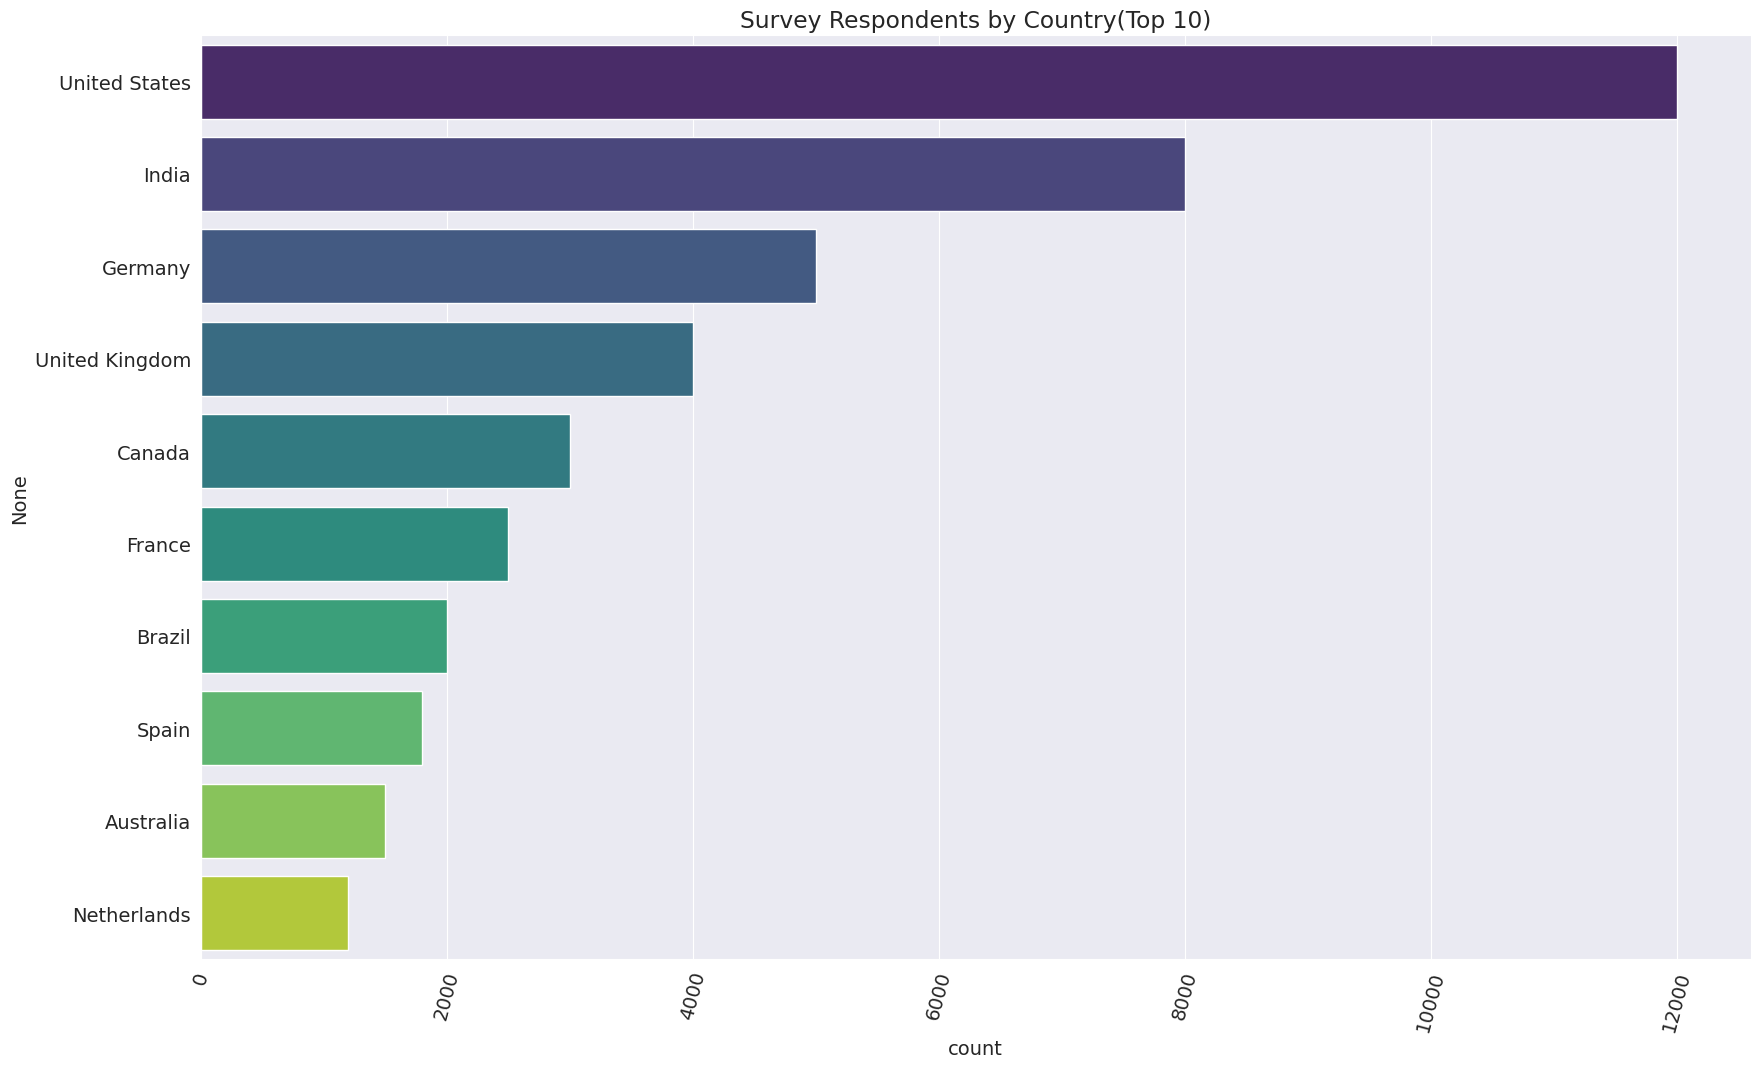

In [ ]:
plt.figure(figsize=(20, 12))
plt.xticks(rotation=75)
sns.barplot(x=top_countries, y=top_countries.index,hue=top_countries.index, palette="viridis")
plt.title("Survey Respondents by Country(Top 10)")
plt.xlabel('count');


It appears that a disproportionately high number of respondents are from the USA, Germany and UK, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.

 **Age**

The distribution of respondents' age is another crucial factor to look at.

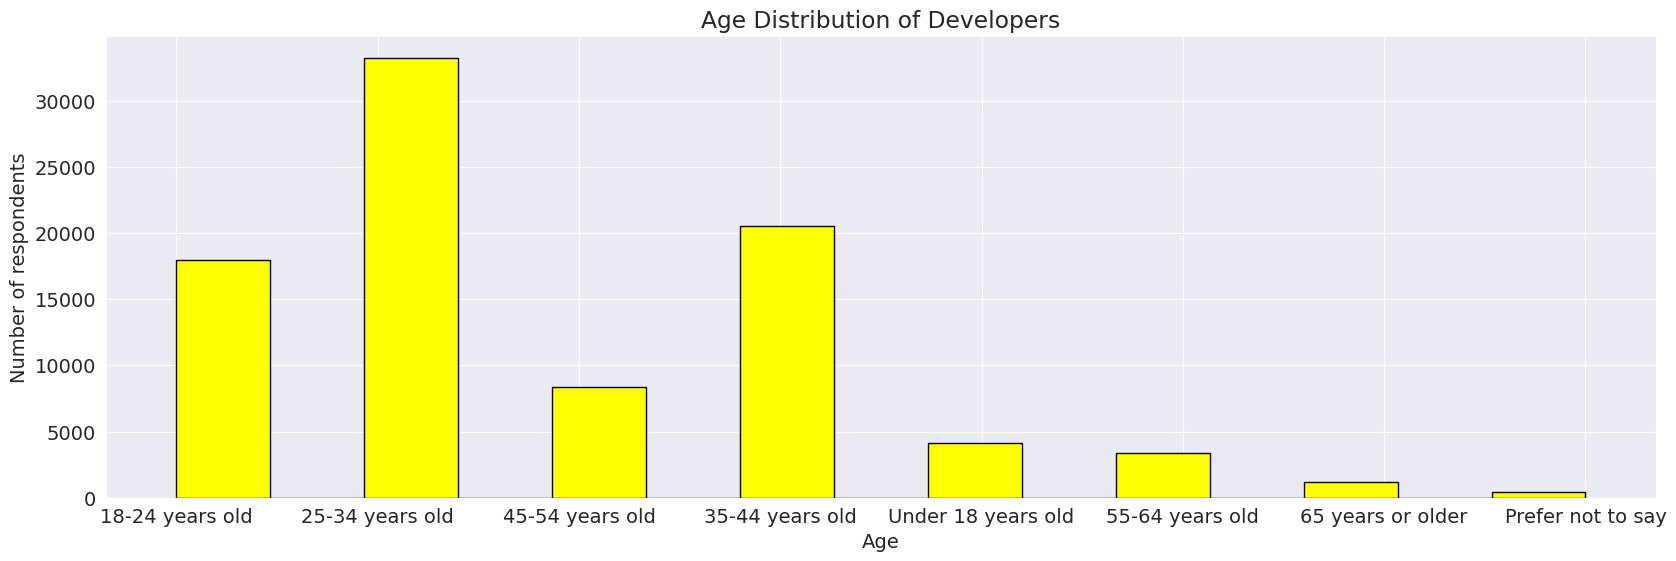

In [ ]:
plt.figure(figsize=(20, 6))
plt.title("Age Distribution of Developers")
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age,bins=15,color='yellow',edgecolor='black');
plt.savefig('/content/ level of formal education by Developers.jpg', format='jpg', dpi=300)


It appears that a large percentage of respondents are 25-34 years old. It's somewhat representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last 20 years.

**Education**

**Education Level**

Formal education in computer science is often considered an essential requirement for becoming a programmer. However, there are many free resources & tutorials available online to learn programming.

 Let's compare the education levels of respondents to gain some insight into this. We'll use a horizontal bar plot here.



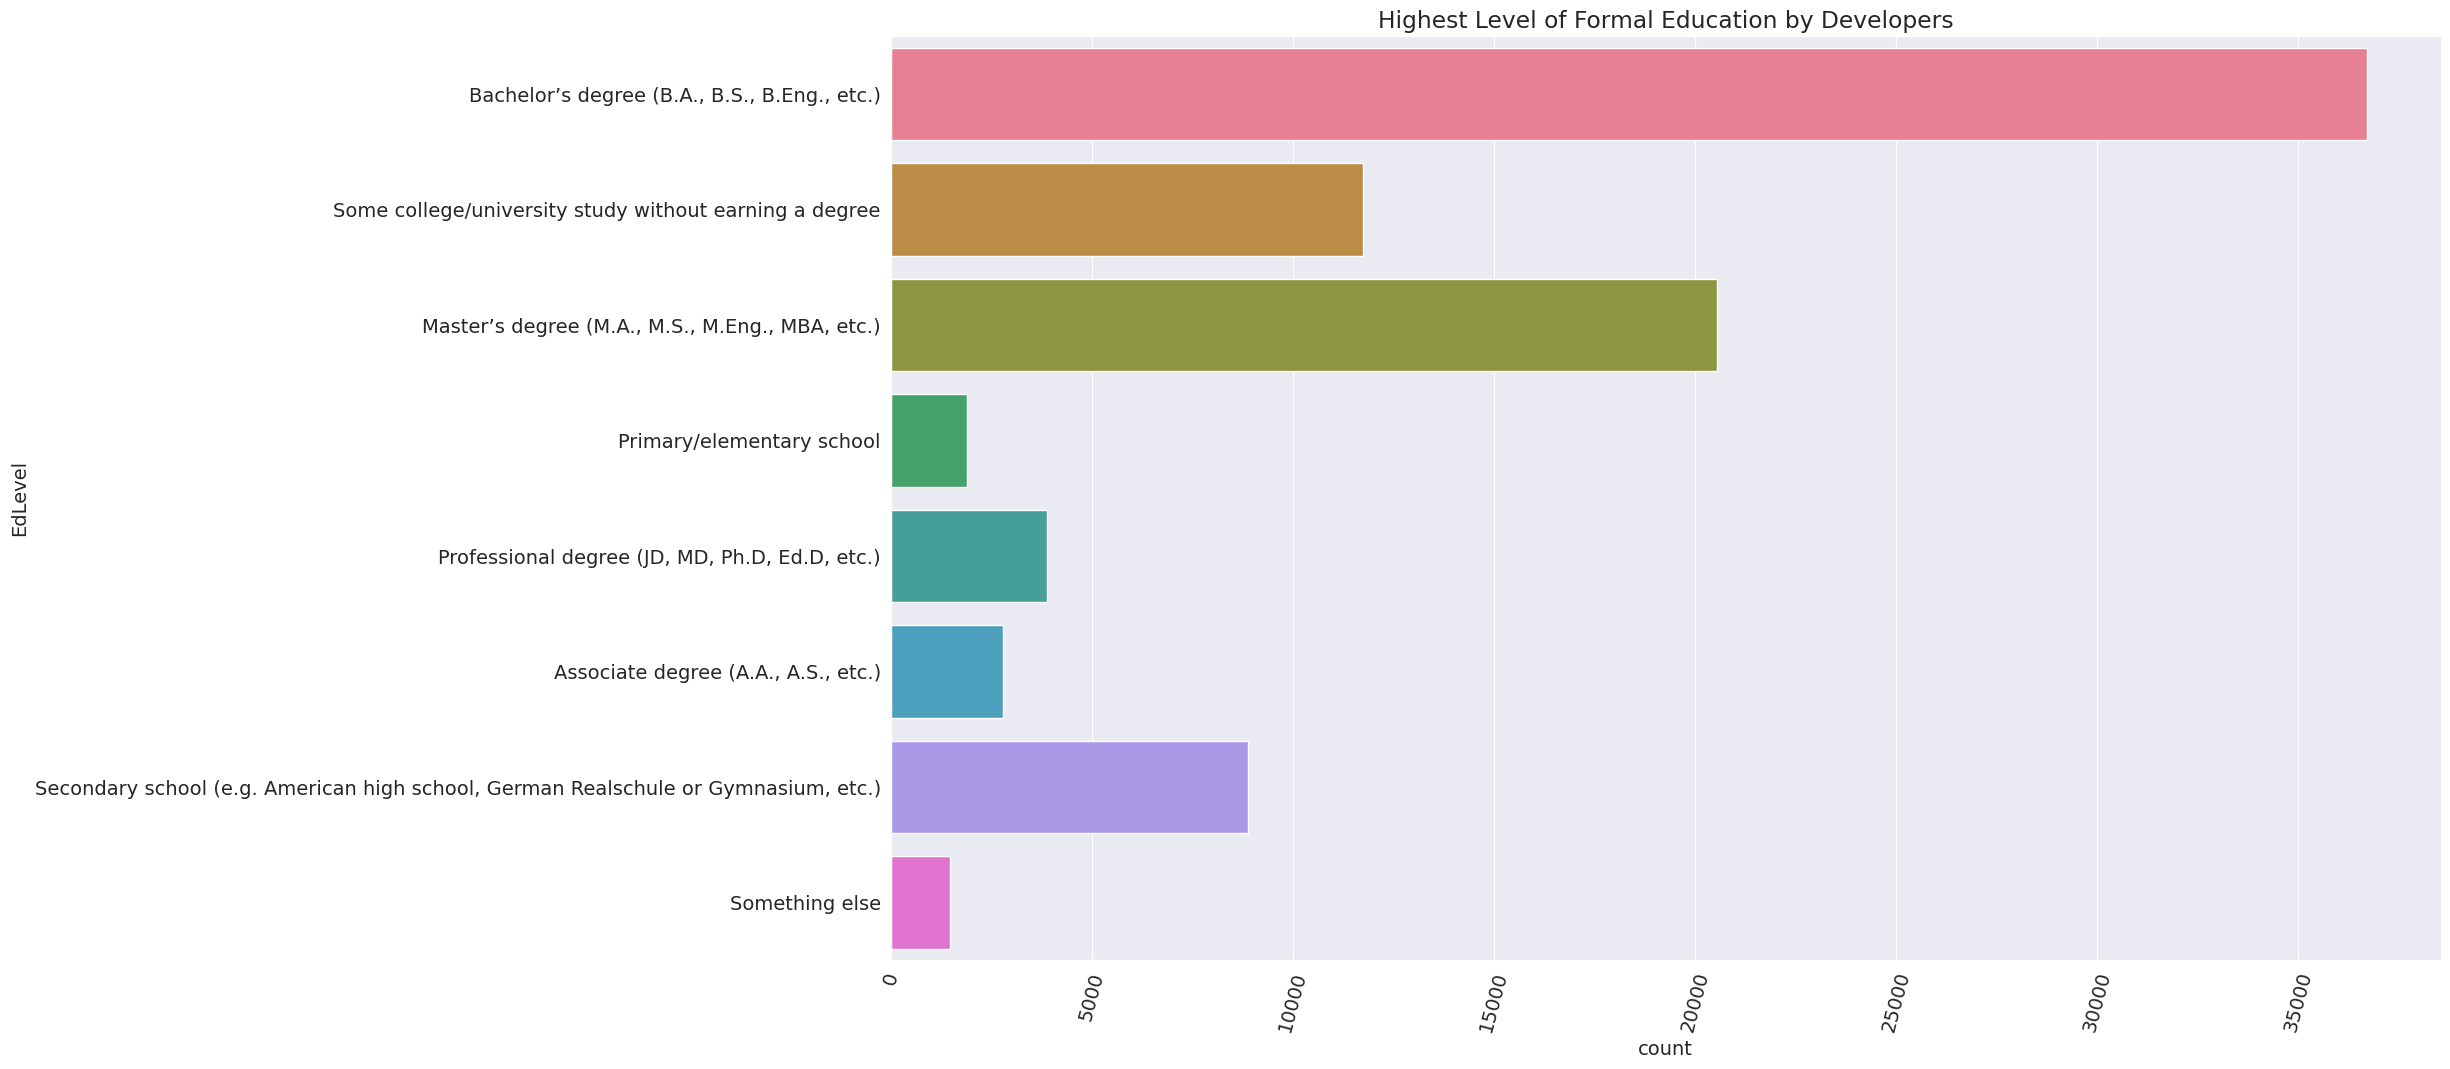

In [ ]:
plt.figure(figsize=(20, 12))
plt.xticks(rotation=75)
plt.title("Highest Level of Formal Education by Developers")
plt.ylabel(None)

# Plot the data with y as hue and no legend
sns.countplot(
    y="EdLevel",
    hue="EdLevel",  # Assign y-variable as hue
    data=survey_df,
    palette="husl",  # Generates distinct colors for each category
    dodge=False  # Ensures single bar per category
)
plt.legend([], [], frameon=False)  # Disable the legend

plt.savefig('/content/ Highest Level of Formal Education by Developers.jpg', format='jpg', dpi=300)
plt.show()


from the the graph we plotted, over 1400 responded that they have bachelors degree,

so i plot a graph showing the percenteage of respondent according to their level of education.



In other to get the percentage i devide the uniquecount of Edlevel with the total count of respondent then * 100

In [ ]:
top_degree=survey_df.EdLevel.value_counts() * 100 / survey_df.EdLevel.count()
top_degree

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          41.724165
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       23.351483
Some college/university study without earning a degree                                13.359781
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    10.113330
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         4.418401
Associate degree (A.A., A.S., etc.)                                                    3.190752
Primary/elementary school                                                              2.165437
Something else                                                                         1.676651
Name: count, dtype: float64

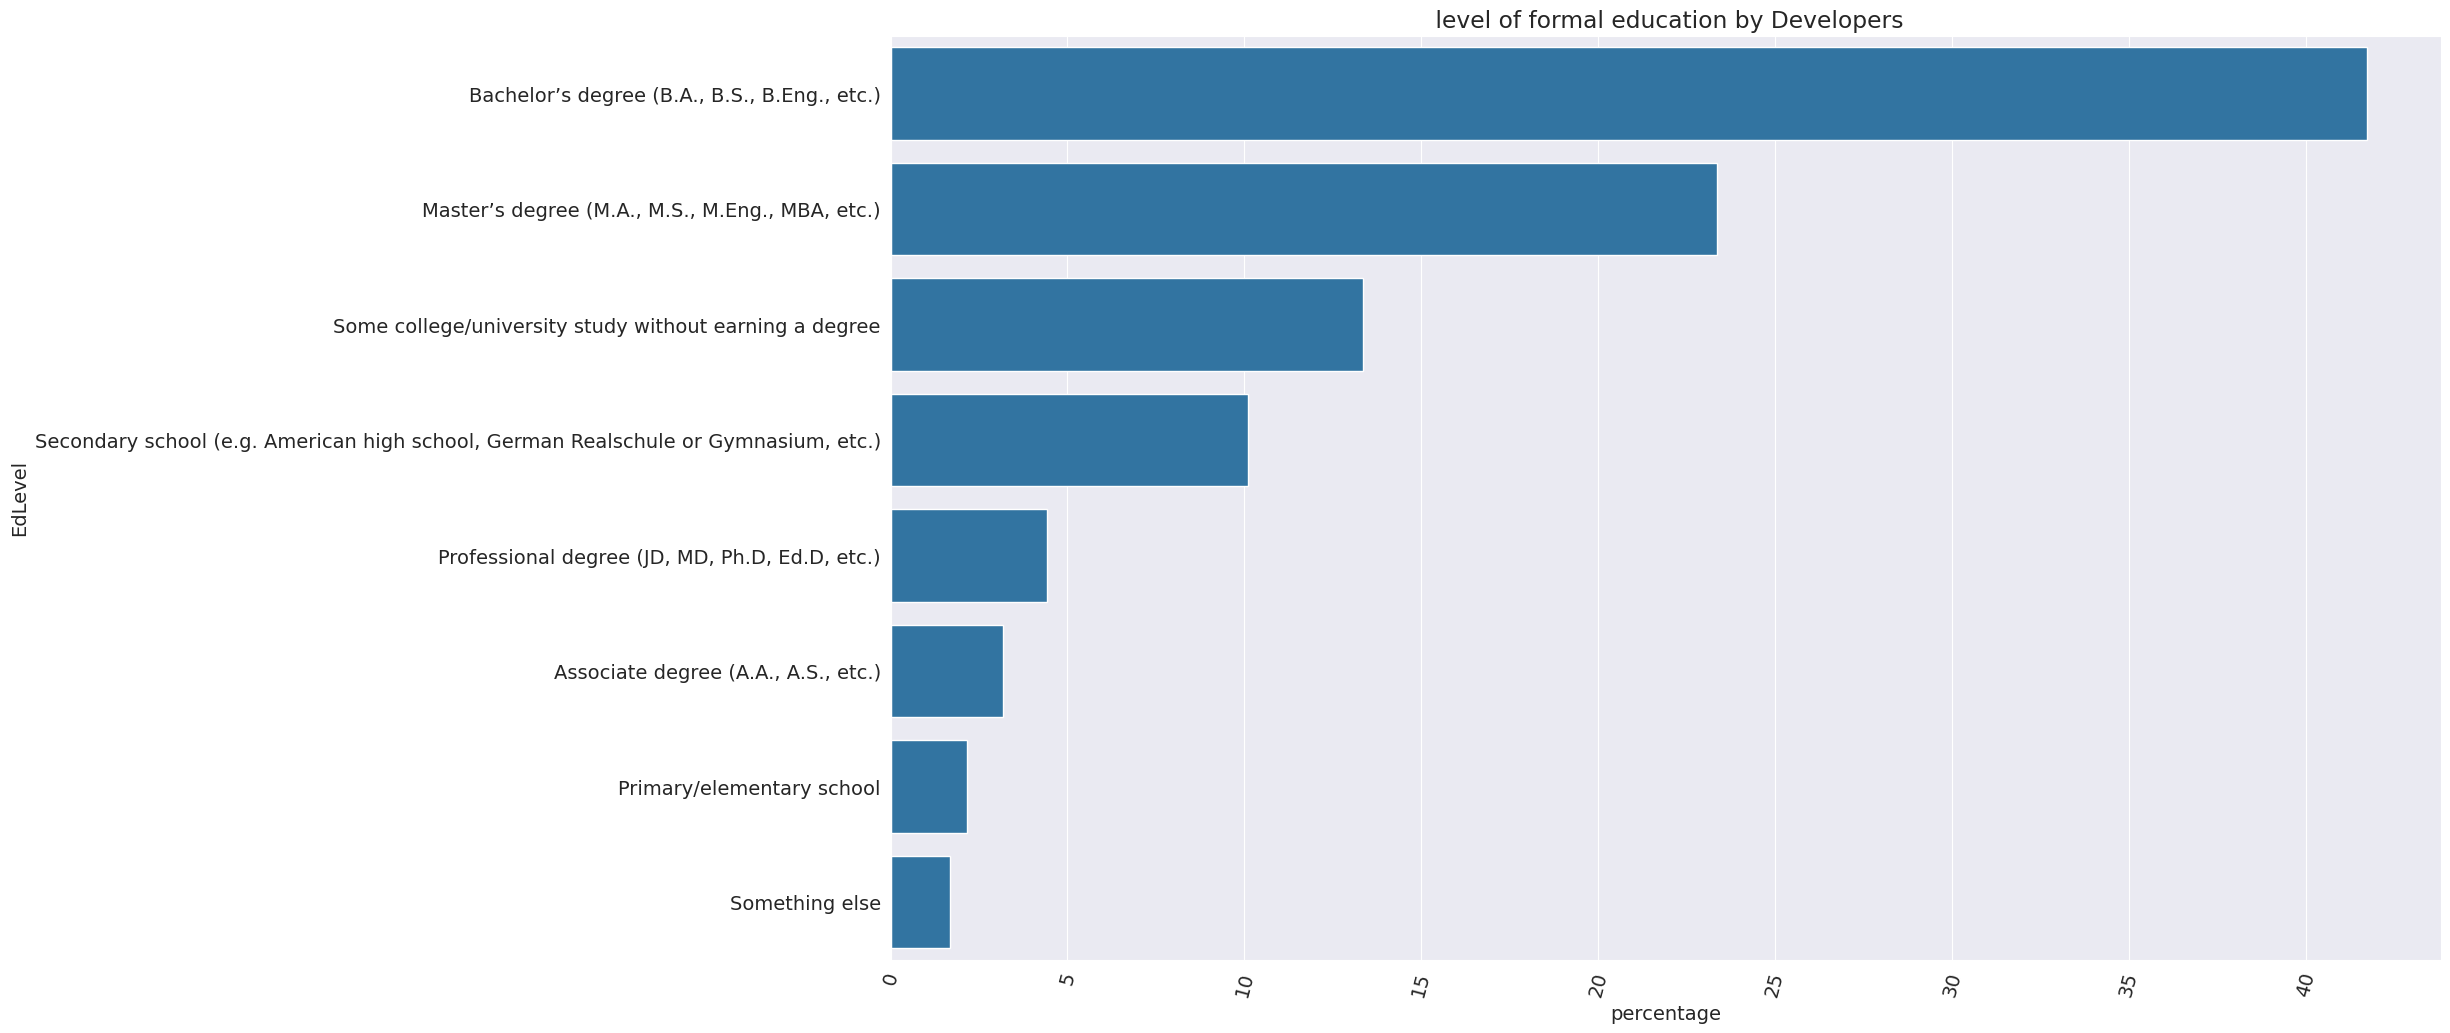

In [ ]:
plt.figure(figsize=(20, 12))
plt.xticks(rotation=75)
sns.barplot(x=top_degree, y=top_degree.index)
plt.title(" level of formal education by Developers")
plt.xlabel('percentage');
plt.savefig('/content/ level of formal education by Developers.jpg', format='jpg', dpi=300)
plt.show()

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.
and also we have more than 10% of respondet from college and high school who only finish seconadary and high school, which is very encouraging. It seems to suggest that while a college education is helpful in general.

**Employment**

Freelancing or contract work is a common choice among programmers, so it would be interesting to compare the breakdown between full-time, part-time, and freelance work. Let's visualize the data from the Employment column.

In [ ]:
schema_name['question'][7]

'Which of the following best describes your current employment status? Select all that apply.'

In [ ]:
survey_df.Employment.nunique()

106

The Employment field contains information about the roles held by respondents. Since the question allows multiple answers, the column contains lists of values separated by a semi-colon ;, making it a bit harder to analyze directly.

In [ ]:
survey_df.Employment.value_counts()

Employment
Employed, full-time                                                                                                                                                                                             53748
Student, full-time                                                                                                                                                                                               7430
Independent contractor, freelancer, or self-employed                                                                                                                                                             7076
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                                                         4354
Not employed, but looking for work                                                                                                                                                                               2553
                                                                                                                                                                                                                ...  
Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, but looking for work;Student, full-time;Employed, part-time;Student, part-time;Not employed, and not looking for work        1
Employed, full-time;Independent contractor, freelancer, or self-employed;Student, full-time;Student, part-time                                                                                                      1
Employed, full-time;Independent contractor, freelancer, or self-employed;Student, full-time;Retired                                                                                                                 1
Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, but looking for work;Not employed, and not looking for work                                                                  1
Employed, full-time;Not employed, but looking for work;Employed, part-time;Student, part-time                                                                                                                       1
Name: count, Length: 106, dtype: int64

I defined a helper function that turns a column containing lists of values (like survey_df.Employment) into a data frame with one column for each possible option.



In [ ]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].items():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

The emp_type_df has one column for each option that can be selected as a response. If a respondent has chosen an option, the corresponding column's value is True. Otherwise, it is False.



In [ ]:
emp_type_df = split_multicolumn(survey_df.Employment)
emp_type_df

Employed, full-time  \
0                    False   
1                     True   
2                     True   
3                     True   
4                     True   
...                    ...   
89179                 True   
89180                False   
89181                False   
89182                False   
89183                 True   

       Independent contractor, freelancer, or self-employed  \
0                                                  False      
1                                                  False      
2                                                  False      
3                                                  False      
4                                                   True      
...                                                  ...      
89179                                               True      
89180                                              False      
89181                                              False      
89182                                              False      
89183                                              False      

       Not employed, but looking for work  Student, full-time  \
0                                   False               False   
1                                   False               False   
2                                   False               False   
3                                   False               False   
4                                   False               False   
...                                   ...                 ...   
89179                               False               False   
89180                               False                True   
89181                               False               False   
89182                               False               False   
89183                               False               False   

       Employed, part-time  Student, part-time  I prefer not to say  Retired  \
0                    False               False                False    False   
1                    False               False                False    False   
2                    False               False                False    False   
3                    False               False                False    False   
4                    False               False                False    False   
...                    ...                 ...                  ...      ...   
89179                False               False                False    False   
89180                 True               False                False    False   
89181                False               False                 True    False   
89182                 True                True                False    False   
89183                False               False                False    False   

       Not employed, and not looking for work  
0                                       False  
1                                       False  
2                                       False  
3                                       False  
4                                       False  
...                                       ...  
89179                                   False  
89180                                   False  
89181                                   False  
89182                                   False  
89183                                   False  

[89184 rows x 9 columns]

In [ ]:
Employee_total=emp_type_df.mean().sort_values(ascending=False)*100
Employee_total

Employed, full-time                                     68.284670
Independent contractor, freelancer, or self-employed    15.684428
Student, full-time                                      13.195192
Employed, part-time                                      5.638904
Not employed, but looking for work                       4.684697
Student, part-time                                       3.801130
Not employed, and not looking for work                   1.547363
Retired                                                  0.826381
I prefer not to say                                      0.615581
dtype: float64

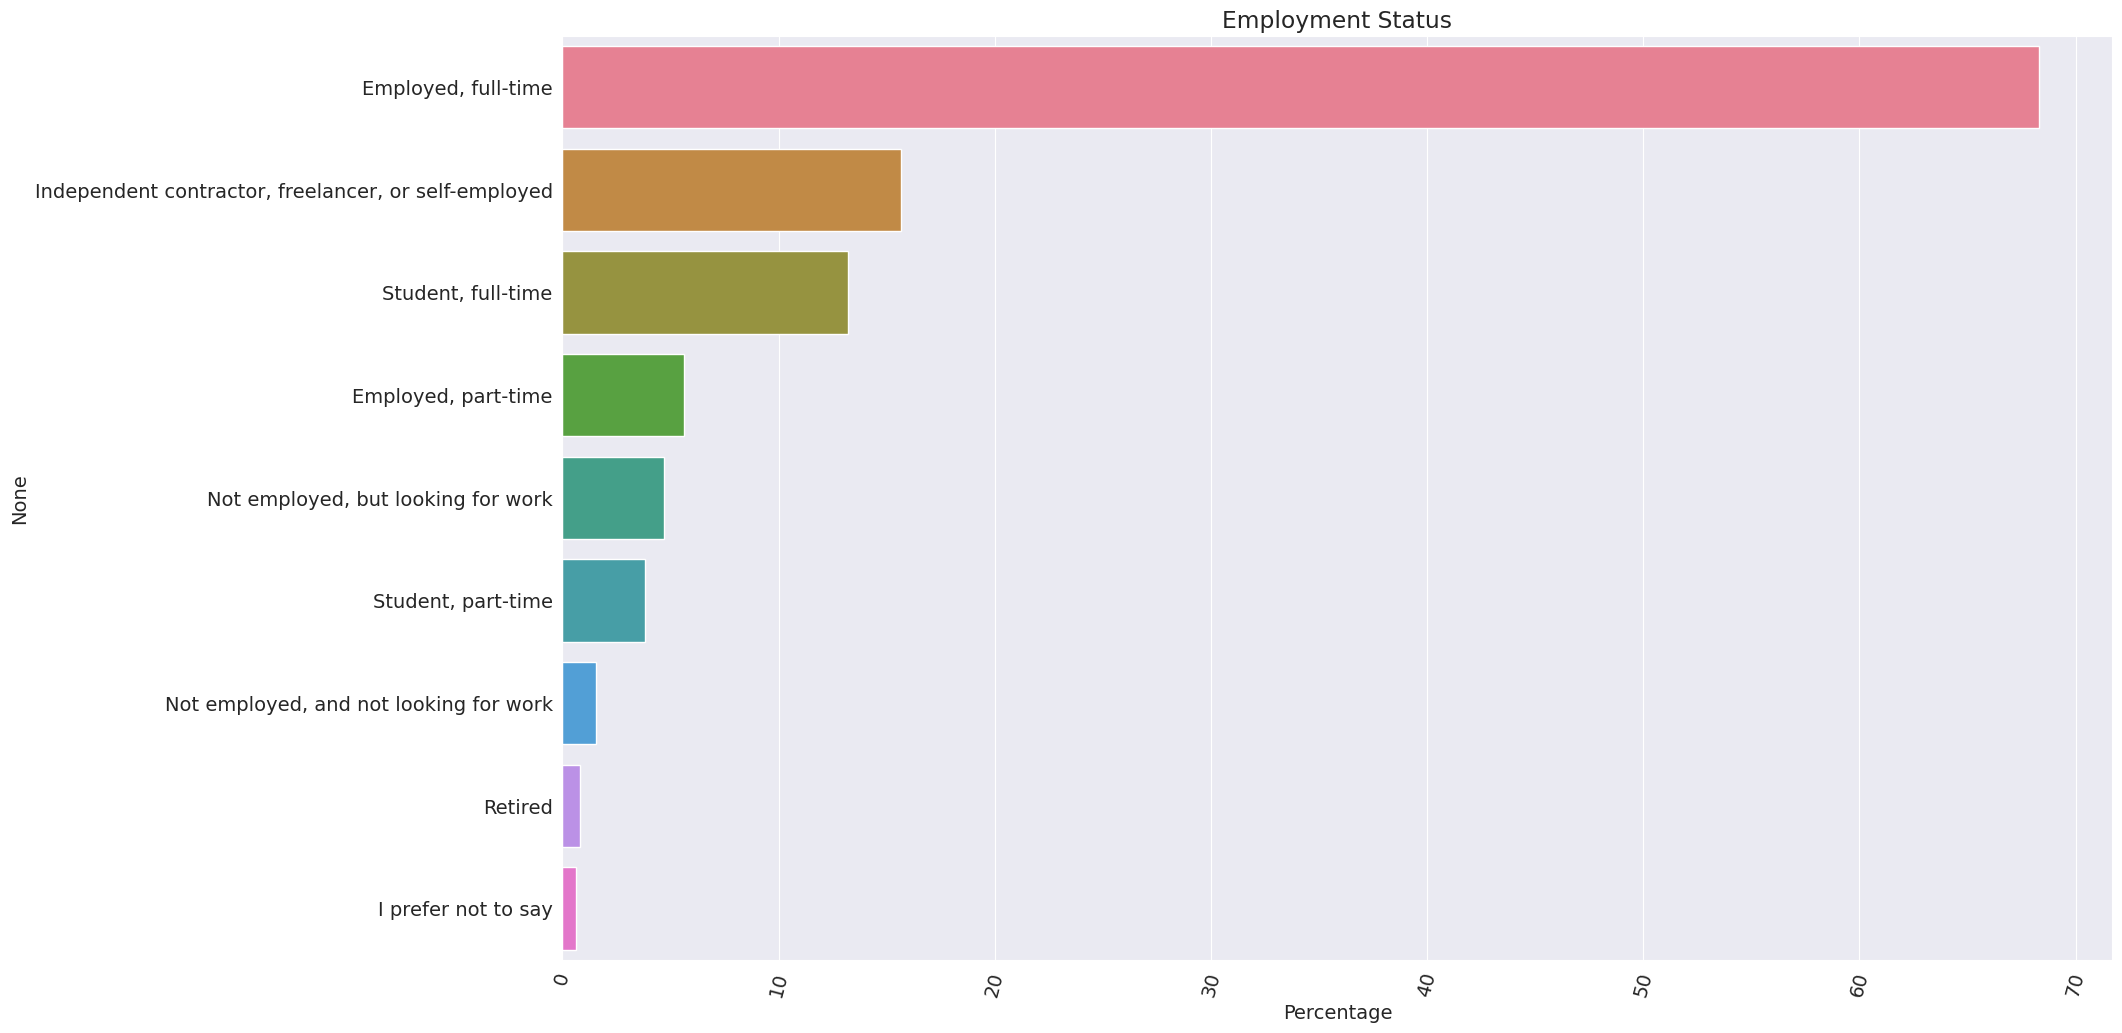

In [ ]:
plt.figure(figsize=(20, 12))
plt.xticks(rotation=75)
sns.barplot(x=Employee_total, y=Employee_total.index,hue=Employee_total.index, palette="husl",legend=False)  # Use a built-in palette for unique colors
plt.title("Employment Status")
plt.xlabel("Percentage")
plt.savefig('/content/ Employment Status.jpg', format='jpg', dpi=300)
plt.show()



As one might expect, the most common Employment statusis full-time(employed).

**Developer roles**

**DevType**

The DevType field contains information about the roles held by respondents. Since the question allows multiple answers, the column contains lists of values separated by a semi-colon ;, making it a bit harder to analyze directly.

In [ ]:
schema_name['question'][17]

'Which of the following describes your current job, the one you do most of the time? Please select only one.'

In [ ]:
survey_df.DevType.nunique()

33

In [ ]:
dev_total=survey_df.DevType.value_counts(normalize=True, ascending=False)*100
dev_total

DevType
Developer, full-stack                            33.477729
Developer, back-end                              17.880373
Developer, front-end                              6.596680
Developer, desktop or enterprise applications     5.078572
Other (please specify):                           4.006660
Developer, mobile                                 3.378343
Engineering manager                               2.644656
Student                                           2.596524
Developer, embedded applications or devices       2.400094
Data scientist or machine learning specialist     2.065772
DevOps specialist                                 1.804298
Academic researcher                               1.761370
Research & Development role                       1.760069
Senior Executive (C-Suite, VP, etc.)              1.732751
Engineer, data                                    1.623478
Cloud infrastructure engineer                     1.347695
Developer, game or graphics                       1.126548
Data or business analyst                          1.088823
System administrator                              0.966542
Project manager                                   0.766209
Developer, QA or test                             0.762306
Security professional                             0.616609
Product manager                                   0.580185
Engineer, site reliability                        0.555469
Educator                                          0.539858
Scientist                                         0.456603
Developer Experience                              0.424082
Blockchain                                        0.420179
Hardware Engineer                                 0.372047
Designer                                          0.365543
Database administrator                            0.334322
Developer Advocate                                0.275783
Marketing or sales professional                   0.193829
Name: proportion, dtype: float64

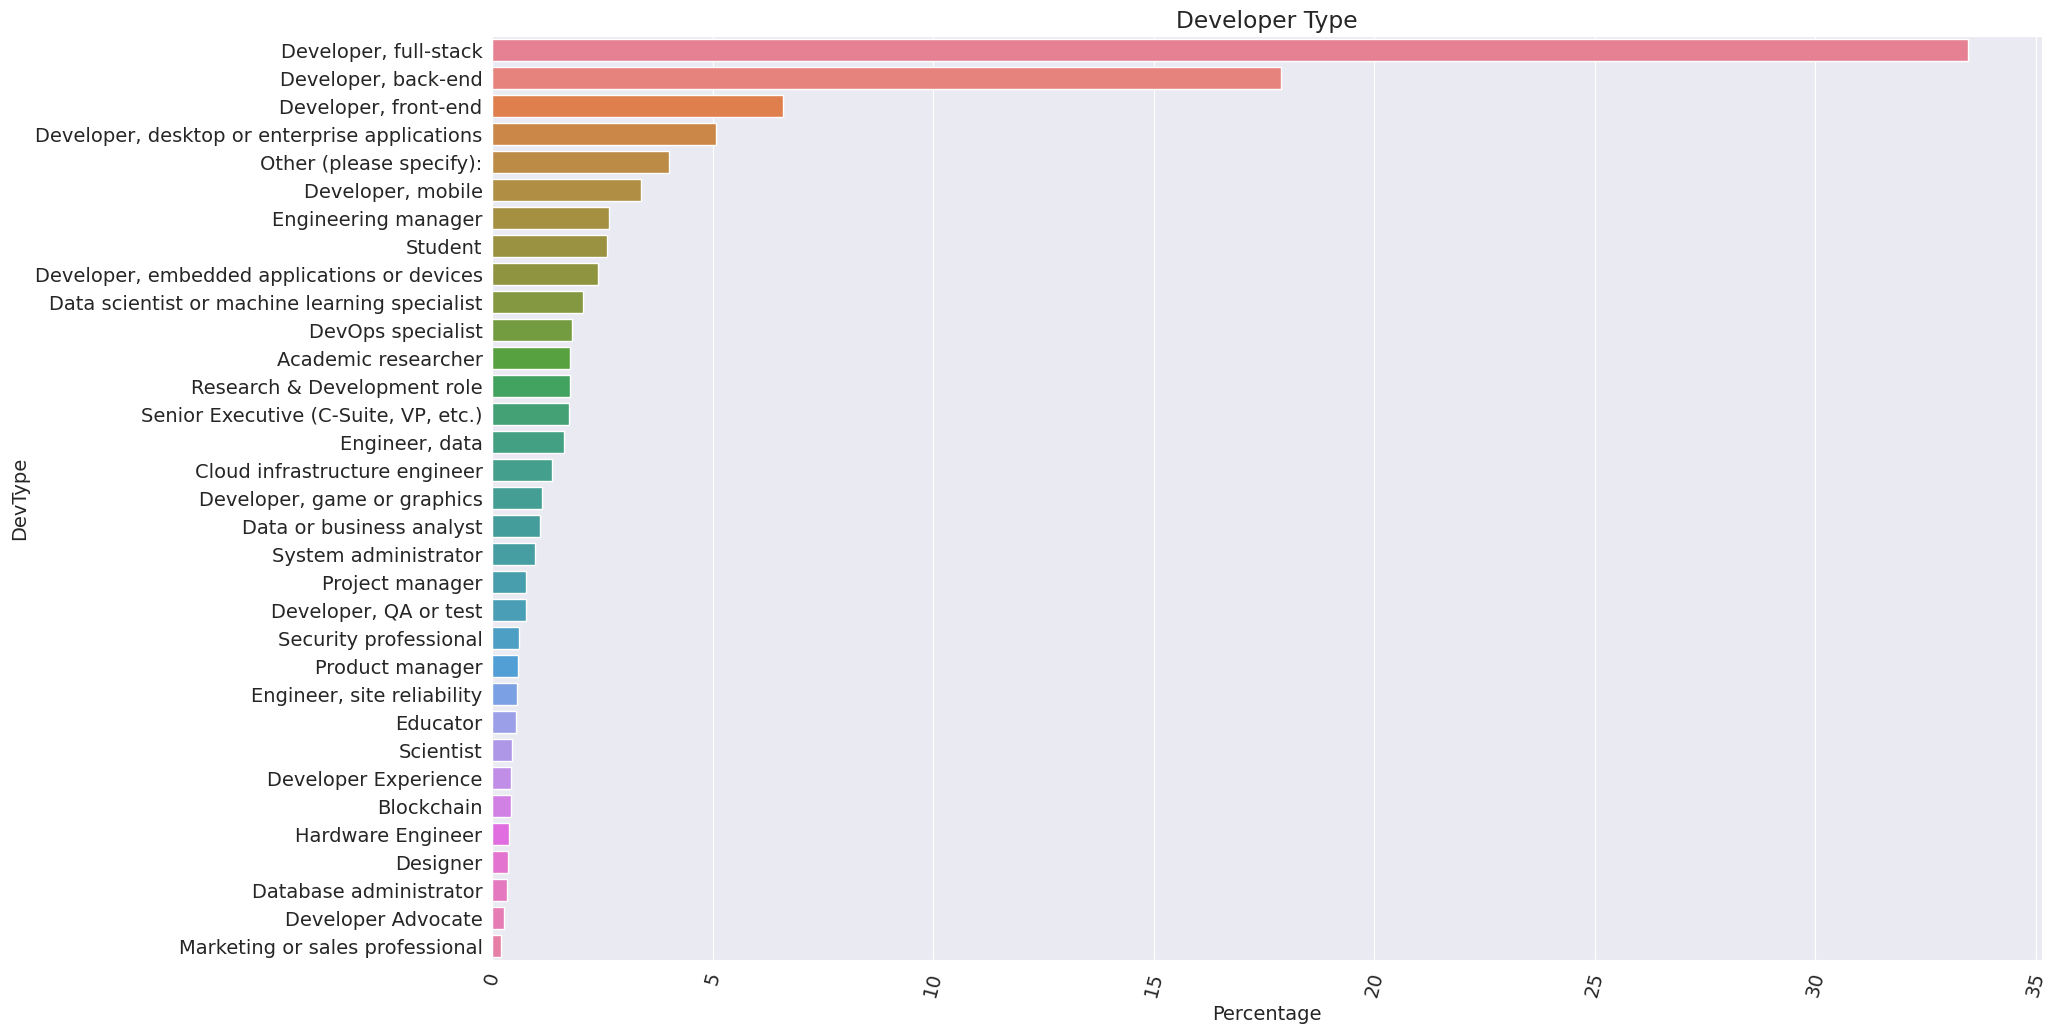

In [ ]:
plt.figure(figsize=(20, 12))
plt.xticks(rotation=75)
sns.barplot(x=dev_total.values, y=dev_total.index, hue=dev_total.index, palette="husl", dodge=False, legend=False)
plt.title("Developer Type")
plt.xlabel('Percentage');
plt.savefig('/content/ Developer Type.jpg', format='jpg', dpi=300)


As one might expect, the most common roles include "Developer" in the name.
we have a large percentage of respondent from the role of fullstack developer, followed by backend and frontend.
we also have 2 penrcentage of people working in the role of a data scientist according to the respondent in the developer community.



**Industry**

The industry developer worked  is another factor we need to consider. The industry field contain information about the industry respondent work for. the company is categorized i.e IT companies,oil & Gas, Healthcare software development e.t,c.

In [ ]:
schema_name['question'][62]

'What industry is the company you work for in?'

In [ ]:
survey_df.Industry.nunique()

12

In [ ]:
Industry_total=survey_df.Industry.value_counts(normalize=True, ascending=False)*100
Industry_total

Industry
Information Services, IT, Software Development, or other Technology    49.379997
Financial Services                                                     12.022081
Other                                                                  10.907163
Manufacturing, Transportation, or Supply Chain                          7.089248
Healthcare                                                              6.025997
Retail and Consumer Services                                            5.316256
Higher Education                                                        3.377386
Advertising Services                                                    2.137380
Insurance                                                               1.922554
Oil & Gas                                                               0.750530
Legal Services                                                          0.571056
Wholesale                                                               0.500354
Name: proportion, dtype: float64

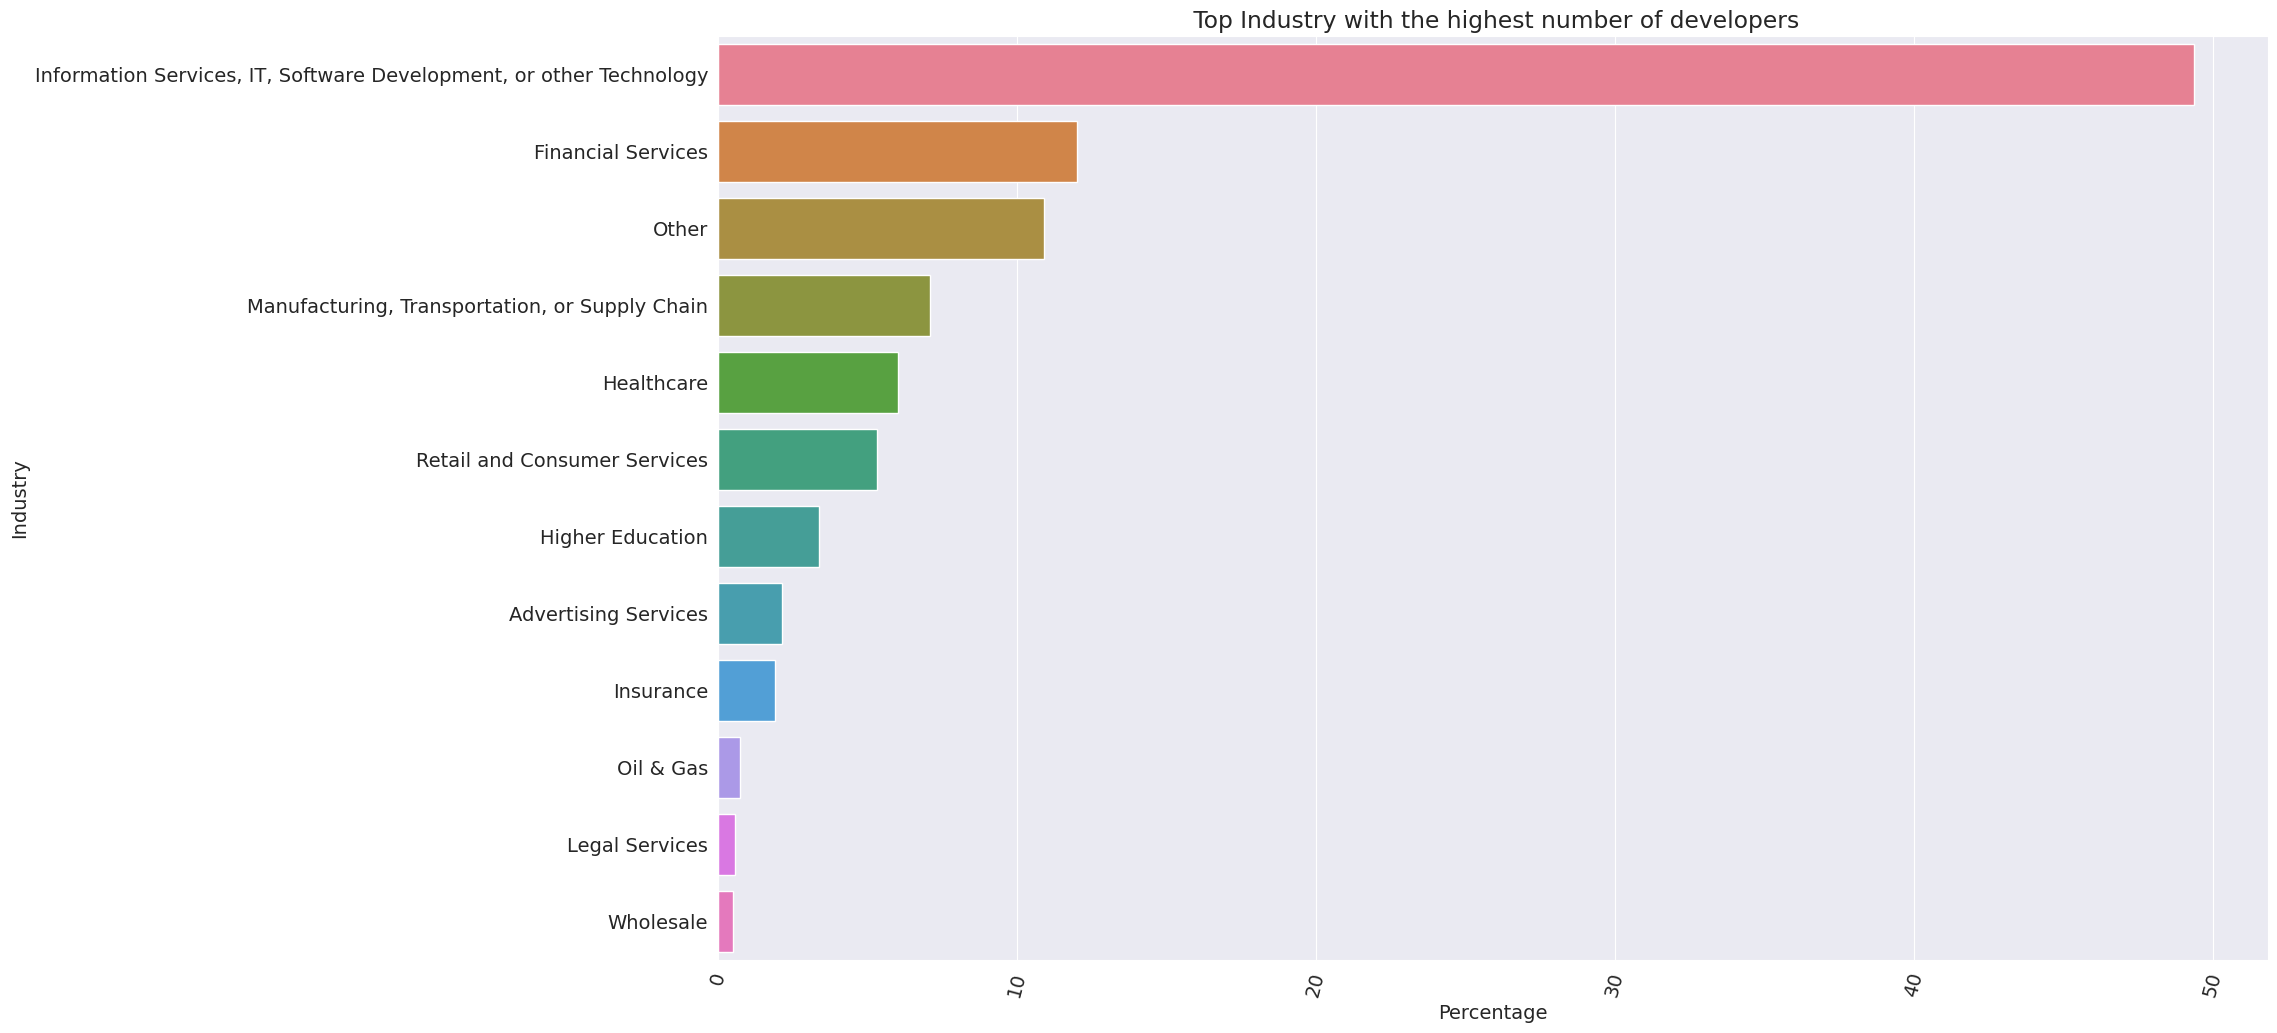

In [ ]:
plt.figure(figsize=(20, 12))
plt.xticks(rotation=75)
sns.barplot(x=Industry_total, y=Industry_total.index,hue=Industry_total.index, palette="husl", dodge=False, legend=False)
plt.title(" Top Industry with the highest number of developers")
plt.xlabel('Percentage');
plt.savefig('/content/ Top Industry with the highest number of developers.jpg', format='jpg', dpi=300)


From our Graph we can see that IT and Software developtment have the highest number of devlopers working in the IT industry(47%).
The financial services company which also have over 10%.


The supplly chain Industry & health almost have same percentage of developers working in the industry.
some developers didnt respond because their company might not in the categorized industry.

**Technology**

I've already gained several insights about the respondents and the programming community by exploring individual columns of the dataset.
lets gain more insight by asking some specific questions and try to answer them using data frame operations and visualizations.

**Q: What are the most popular programming languages in 2023?**

To answer this, we can use the LanguageWorkedWith column, respondents were allowed to choose multiple options here.

In [ ]:
survey_df.LanguageHaveWorkedWith

0                                                      NaN
1                               HTML/CSS;JavaScript;Python
2                               Bash/Shell (all shells);Go
3        Bash/Shell (all shells);HTML/CSS;JavaScript;PH...
4                           HTML/CSS;JavaScript;TypeScript
                               ...                        
89179              HTML/CSS;Java;JavaScript;SQL;TypeScript
89180                                 Dart;Java;Python;SQL
89181    Assembly;Bash/Shell (all shells);C;C#;Python;R...
89182    Bash/Shell (all shells);C#;HTML/CSS;Java;JavaS...
89183                      C#;Go;JavaScript;SQL;TypeScript
Name: LanguageHaveWorkedWith, Length: 89184, dtype: object

In [ ]:
languages_worked_df = split_multicolumn(survey_df.LanguageHaveWorkedWith)
languages_worked_df

HTML/CSS  JavaScript  Python  Bash/Shell (all shells)     Go    PHP  \
0         False       False   False                    False  False  False   
1          True        True    True                    False  False  False   
2         False       False   False                     True   True  False   
3          True        True   False                     True  False   True   
4          True        True   False                    False  False  False   
...         ...         ...     ...                      ...    ...    ...   
89179      True        True   False                    False  False  False   
89180     False       False    True                    False  False  False   
89181     False       False    True                     True  False  False   
89182      True        True    True                     True  False  False   
89183     False        True   False                    False   True  False   

        Ruby    SQL  TypeScript    Ada  ...  GDScript  Crystal  Cobol  \
0      False  False       False  False  ...     False    False  False   
1      False  False       False  False  ...     False    False  False   
2      False  False       False  False  ...     False    False  False   
3       True   True        True  False  ...     False    False  False   
4      False  False        True  False  ...     False    False  False   
...      ...    ...         ...    ...  ...       ...      ...    ...   
89179  False   True        True  False  ...     False    False  False   
89180  False   True       False  False  ...     False    False  False   
89181  False   True       False  False  ...     False    False  False   
89182  False   True       False  False  ...     False    False  False   
89183  False   True        True  False  ...     False    False  False   

       Fortran  Prolog  Erlang   Apex    SAS    Nim   Flow  
0        False   False   False  False  False  False  False  
1        False   False   False  False  False  False  False  
2        False   False   False  False  False  False  False  
3        False   False   False  False  False  False  False  
4        False   False   False  False  False  False  False  
...        ...     ...     ...    ...    ...    ...    ...  
89179    False   False   False  False  False  False  False  
89180    False   False   False  False  False  False  False  
89181    False   False   False  False  False  False  False  
89182    False   False   False  False  False  False  False  
89183    False   False   False  False  False  False  False  

[89184 rows x 51 columns]

It appears that a total of 51 languages were included among the options. i aggregate these to identify the percentage of respondents who selected each language.

In [ ]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript                 62.467483
HTML/CSS                   52.022784
Python                     48.392088
SQL                        47.792205
TypeScript                 38.169403
Bash/Shell (all shells)    31.789334
Java                       30.002018
C#                         27.127063
C++                        22.015160
C                          18.994438
PHP                        18.247668
PowerShell                 13.345443
Go                         12.997847
Rust                       12.812836
Kotlin                      8.897336
Ruby                        6.115447
Lua                         5.983136
Dart                        5.912496
Assembly                    5.329431
Swift                       4.565841
R                           4.150969
Visual Basic (.Net)         4.000718
MATLAB                      3.743945
VBA                         3.483809
Groovy                      3.336921
Delphi                      3.174336
Scala                       2.715734
Perl                        2.411868
Elixir                      2.273950
Objective-C                 2.263859
Haskell                     2.050816
GDScript                    1.676310
Lisp                        1.504754
Solidity                    1.309652
Clojure                     1.239011
Julia                       1.132490
Erlang                      0.973269
F#                          0.951964
Fortran                     0.934024
Prolog                      0.870111
Zig                         0.817411
Ada                         0.759105
OCaml                       0.688464
Apex                        0.649220
Cobol                       0.645856
SAS                         0.478785
Crystal                     0.436177
Nim                         0.371143
APL                         0.252287
Flow                        0.239953
Raku                        0.174919
dtype: float64

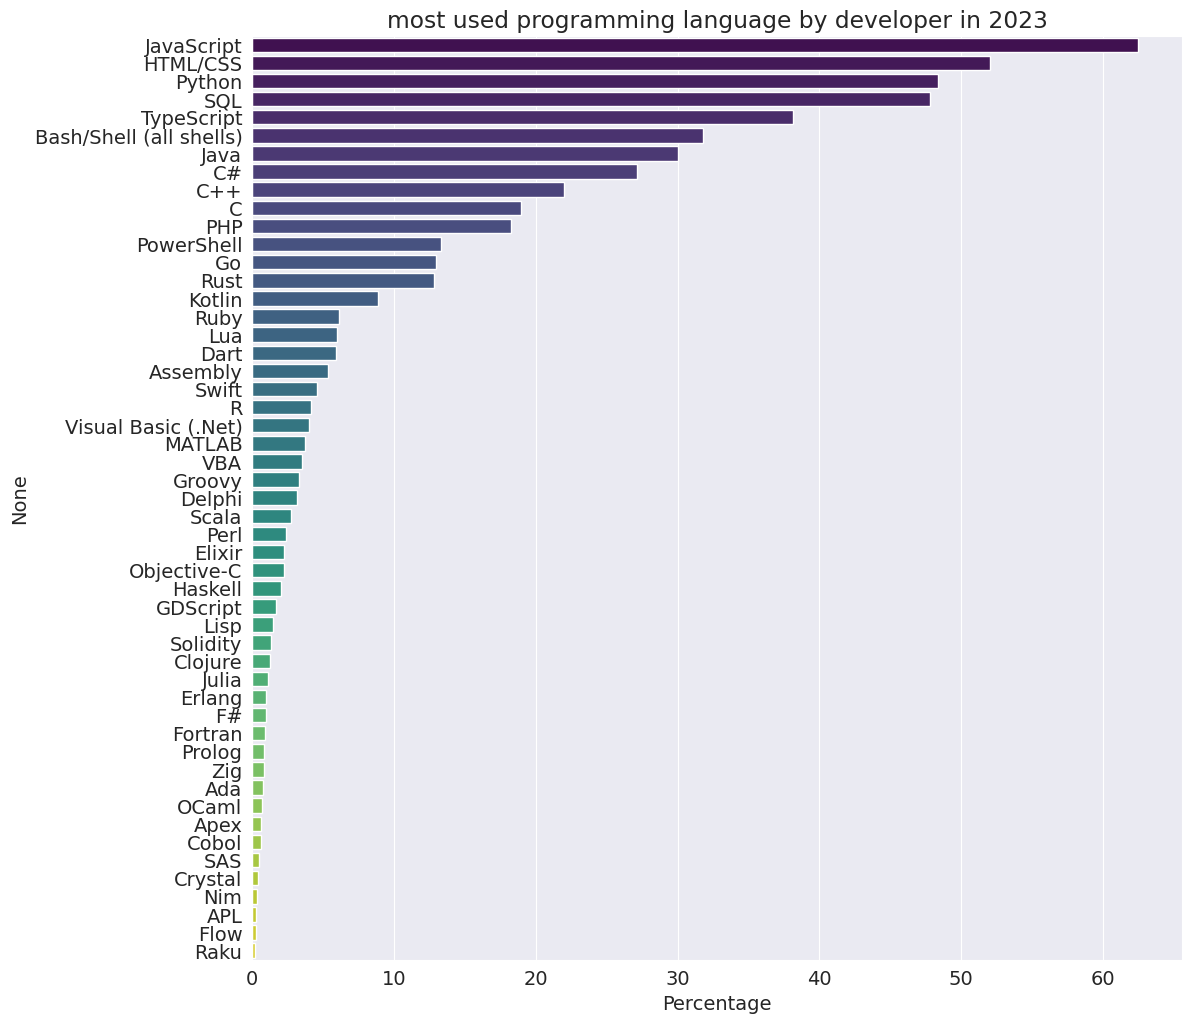

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index, hue=languages_worked_percentages.index, dodge=False, palette='viridis', legend=False)
plt.title("most used programming language by developer in 2023");
plt.xlabel('Percentage');
plt.savefig('/content/most used programming language by developer in 2023.jpg', format='jpg', dpi=300)

Perhaps unsurprisingly, Javascript & HTML/CSS comes out at the top as web development is one of today's most sought skills. Python seems to be popular because that's the third most commonly-used language.
Professional developers top three technologies are the same as last year—JavaScript, HTML/CSS, and SQL.

**Q2: What are the most popular Databases in 2023?**

we can use the DatabaseHaveWorkedWith column, respondents were allowed to choose multiple options here

In [ ]:
schema_name['question'][27]

'Which <b>database environments </b>have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the database and want to continue to do so, please check both boxes in that row.)'

In [ ]:
survey_df.DatabaseHaveWorkedWith.value_counts()

DatabaseHaveWorkedWith
PostgreSQL                                                                                                                                                       4350
Microsoft SQL Server                                                                                                                                             3322
MySQL                                                                                                                                                            3116
SQLite                                                                                                                                                           2299
MongoDB                                                                                                                                                          1663
                                                                                                                                                                 ... 
Cassandra;Elasticsearch;MariaDB;MySQL;PostgreSQL;Redis;Solr                                                                                                         1
Cassandra;Cockroachdb;Couch DB;Couchbase;Elasticsearch;Firebird;MariaDB;Microsoft Access;Microsoft SQL Server;MongoDB;MySQL;Neo4J;Oracle;PostgreSQL;Snowflake       1
Elasticsearch;IBM DB2;Microsoft SQL Server;MySQL;Oracle;PostgreSQL                                                                                                  1
BigQuery;Cloud Firestore;Elasticsearch;MongoDB;MySQL;Oracle;PostgreSQL;Redis;SQLite                                                                                 1
Firebird;IBM DB2;MariaDB;Microsoft Access;Microsoft SQL Server;MongoDB;MySQL;PostgreSQL;SQLite                                                                      1
Name: count, Length: 11096, dtype: int64

Respondents chose multiple columns, so we need to seperate columnn using the split_column function here also.

In [ ]:
Database_worked_df = split_multicolumn(survey_df.DatabaseHaveWorkedWith)
Database_worked_df

Supabase  PostgreSQL  Redis  BigQuery  Elasticsearch  MongoDB  \
0         False       False  False     False          False    False   
1          True       False  False     False          False    False   
2         False       False  False     False          False    False   
3         False        True   True     False          False    False   
4         False        True  False      True           True     True   
...         ...         ...    ...       ...            ...      ...   
89179     False        True  False     False          False     True   
89180     False        True  False     False          False    False   
89181     False       False  False     False          False    False   
89182     False       False   True     False          False     True   
89183     False       False   True     False          False    False   

       Cloud Firestore  MariaDB  Microsoft SQL Server  MySQL  ...   Solr  \
0                False    False                 False  False  ...  False   
1                False    False                 False  False  ...  False   
2                False    False                 False  False  ...  False   
3                False    False                 False  False  ...  False   
4                False    False                 False  False  ...  False   
...                ...      ...                   ...    ...  ...    ...   
89179            False    False                 False   True  ...  False   
89180            False    False                 False  False  ...  False   
89181            False    False                 False  False  ...  False   
89182            False     True                  True   True  ...  False   
89183            False    False                  True  False  ...  False   

       Cockroachdb  Snowflake  Couch DB  RavenDB  Neo4J  Clickhouse  DuckDB  \
0            False      False     False    False  False       False   False   
1            False      False     False    False  False       False   False   
2            False      False     False    False  False       False   False   
3            False      False     False    False  False       False   False   
4            False      False     False    False  False       False   False   
...            ...        ...       ...      ...    ...         ...     ...   
89179        False      False     False    False  False       False   False   
89180        False      False     False    False  False       False   False   
89181        False      False     False    False  False       False   False   
89182        False      False     False    False  False       False   False   
89183        False      False     False    False  False       False   False   

        TiDB  Couchbase  
0      False      False  
1      False      False  
2      False      False  
3      False      False  
4      False      False  
...      ...        ...  
89179  False      False  
89180  False      False  
89181  False      False  
89182  False      False  
89183  False      False  

[89184 rows x 32 columns]

It appears that a total of 32 databases were included among the options. i aggregate these to identify the percentage of respondents who selected each language.

In [ ]:
Databases_worked_percentages=Database_worked_df.mean().sort_values(ascending=False)*100
Databases_worked_percentages

PostgreSQL                    39.142671
MySQL                         35.307903
SQLite                        26.549605
MongoDB                       21.927700
Microsoft SQL Server          21.871636
Redis                         17.535657
MariaDB                       15.131638
Elasticsearch                 11.507670
Oracle                         8.417429
Dynamodb                       7.622443
Firebase Realtime Database     5.537989
Cloud Firestore                5.495380
BigQuery                       3.875135
Microsoft Access               3.652000
H2                             3.148547
Cosmos DB                      2.996053
Supabase                       2.379351
InfluxDB                       2.344591
Cassandra                      2.160701
Snowflake                      2.040725
Neo4J                          1.605669
IBM DB2                        1.585486
Solr                           1.333199
Firebird                       1.291712
Couch DB                       0.994573
Clickhouse                     0.951964
Cockroachdb                    0.891416
Couchbase                      0.670524
DuckDB                         0.525879
Datomic                        0.273592
RavenDB                        0.254530
TiDB                           0.176041
dtype: float64

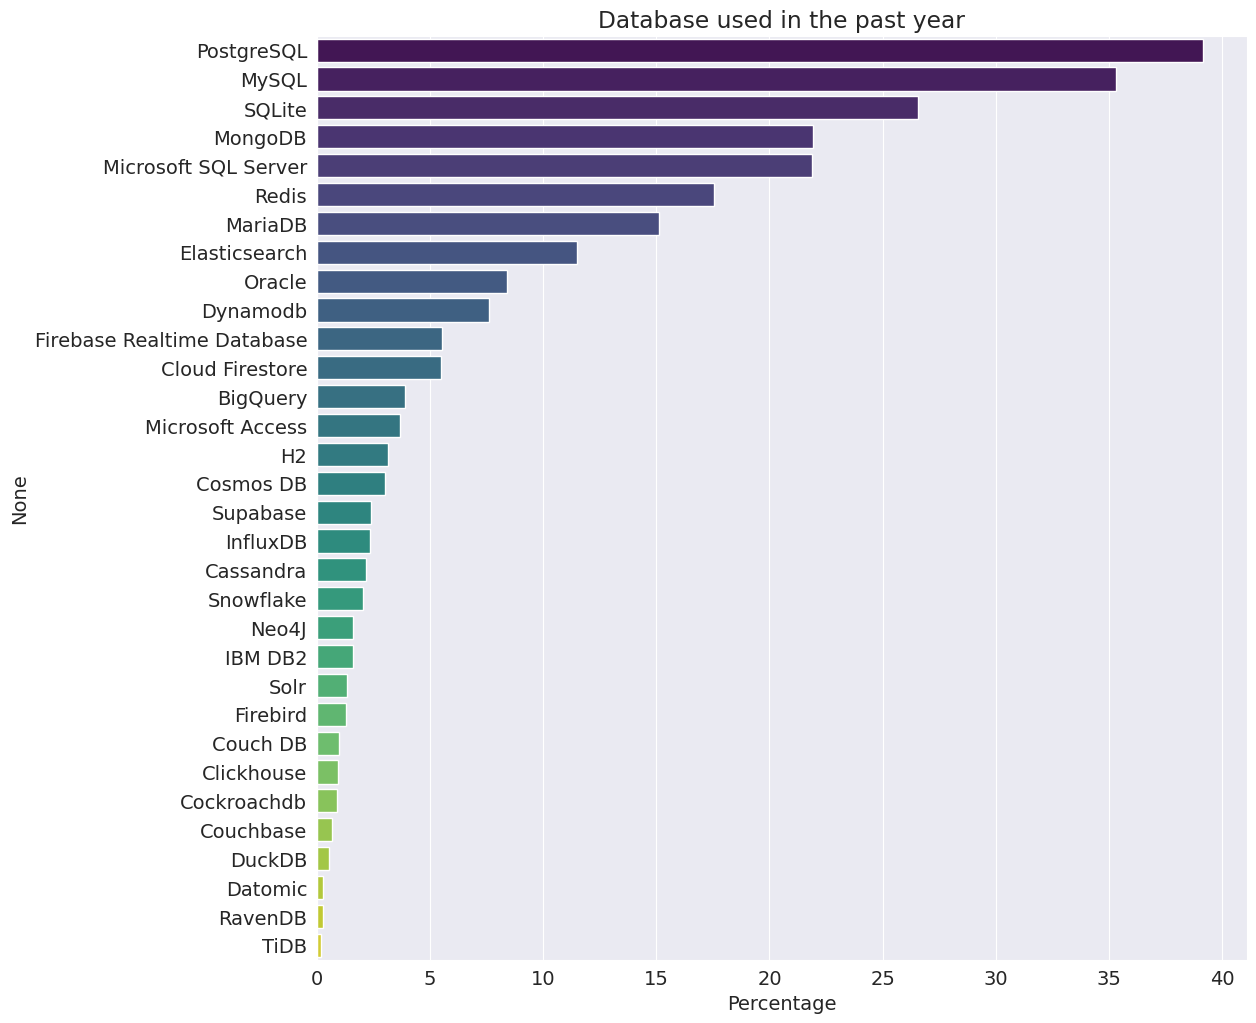

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(x=Databases_worked_percentages, y=Databases_worked_percentages.index, hue=Databases_worked_percentages.index, dodge=False, palette='viridis', legend=False)
plt.title("Database used in the past year");
plt.xlabel('Percentage');
plt.savefig('/content/database_usage.jpg', format='jpg', dpi=300)



This year, PostgreSQL took over the first place spot from MySQL because Professional Developers are more likely to use use PostgreSQL and those learning to code are more likely to use MySQL.

# **Inferences and Conclusions**

We've drawn many inferences from the survey. Here's a summary of a few of them:

* Based on the survey respondents' demographics, we can infer that the survey is
somewhat representative of the overall programming community. However, it has fewer responses from programmers in non-English-speaking countries. i.e the survey tends to have some selection bias.

* Although most programmers hold a college degree, a reasonably large percentage did not have computer science as their college major. Hence, a computer science degree isn't compulsory for learning to code or building a career in programming.

* A significant percentage of programmers either work part-time or as freelancers, which can be a great way to break into the field, especially when you're just getting started.

* Javascript & HTML/CSS are the most used programming languages in 2023, closely followed by python & SQL.

* PostgreSQL & mySQL are the most used databases in 2023.

* You can learn and start programming professionally at any age.

* Full-stack, back-end, front-end, and desktop/enterprise app developers continue to account for the majority of all respondents(developertype).

* Most programmers are individual contributors and are in the IT industry (49%), followed by financial services and supply chain.